# Keras Demos Jupyter

Basically following some of the examples https://github.com/keras-team/keras/tree/master/examples, but with a few more prints/plots for the sake of helping myself see what is going on. I use https://github.com/jupyter/docker-stacks/tree/master/tensorflow-notebook for the environment, though this means no GPU at time of writing. You'll also have to install pydot and graphvis for the model summary.

*Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.*

In [9]:
from __future__ import print_function
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib
import matplotlib.pyplot as plt
import math

In [10]:
batch_size = 128
num_classes = 10
epochs = 12

In [11]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# We're reshaping data lets store these to save reshaping back into something easy to plot.
x_train_plots = x_train
x_test_plots = x_test
y_test_raw = y_test

# As we will see below each item in x is a 28x28 greyscale image.
print("Training size: " + str(len(x_train)))
assert(len(x_train)==len(y_train))

Training size: 60000


## Looking at some of the training data

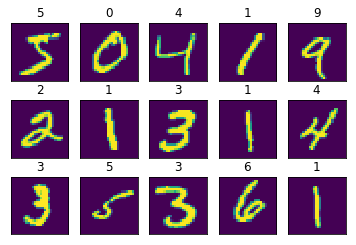

In [12]:
fig = plt.figure()
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train_plots[i])
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])

## Reshaping the data

In [13]:
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(input_shape)

channels_last
(28, 28, 1)


In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("\n")
print(str(y_test_raw[0]) + "  becomes ->  " +str(y_test[0]))

x_train shape: (60000, 28, 28, 1)


7  becomes ->  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


## Defining the architecture of the network.

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

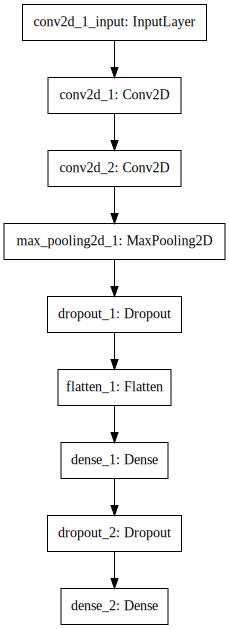

In [16]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Actually fitting the model

In [82]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2710 - acc: 0.9147 - val_loss: 0.0570 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0884 - acc: 0.9731 - val_loss: 0.0423 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0662 - acc: 0.9804 - val_loss: 0.0340 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0543 - acc: 0.9830 - val_loss: 0.0350 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0463 - acc: 0.9864 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0307 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0369 - acc: 0.9887 - val_loss: 0.0284 - va

Eye balling some of the errors
- Each prediction outputs a probability distribution across the different classes, eg below the model is very sure we have a 7

([], <a list of 0 Text yticklabel objects>)

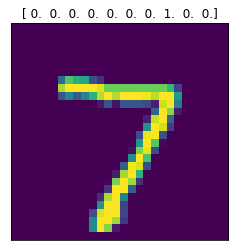

In [83]:
plt.imshow(x_test_plots[0])
plt.title(y_test[0])
plt.xticks([])
plt.yticks([])

<BarContainer object of 10 artists>

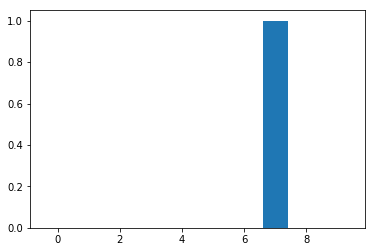

In [84]:
predictions = model.predict(x_test)
plt.bar(range(10),predictions[0])

In [85]:
# Happy little coincidence that the position in the array will be the same as the value.
maxpredictions = np.argmax(predictions, axis = 1)
assert(len(predictions)==len(y_test))

In [96]:
errors = np.where(np.not_equal(maxpredictions, y_test_raw))
errors

(array([ 247,  259,  321,  445,  449,  659,  882,  883,  938,  947, 1014,
        1039, 1112, 1202, 1226, 1232, 1247, 1260, 1319, 1393, 1414, 1530,
        1549, 1709, 1717, 1790, 1878, 1901, 2035, 2098, 2118, 2129, 2130,
        2135, 2293, 2406, 2414, 2462, 2597, 2654, 2720, 2760, 2896, 2921,
        2927, 2939, 2953, 3030, 3060, 3073, 3225, 3422, 3503, 3520, 3558,
        3727, 3767, 3808, 3941, 4075, 4176, 4201, 4248, 4497, 4601, 4639,
        4740, 4761, 4807, 4823, 5888, 5937, 5955, 6166, 6576, 6597, 6625,
        8094, 9009, 9015, 9638, 9642, 9664, 9692, 9729, 9770, 9839]),)

## One example of an erroneous prediction

([], <a list of 0 Text yticklabel objects>)

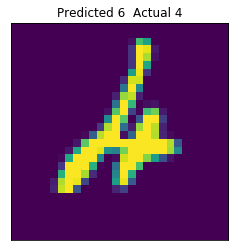

In [94]:
plt.imshow(x_test_plots[247])
plt.title("Predicted " + str(maxpredictions[247]) + "  Actual " + str(y_test_raw[247]))
plt.xticks([])
plt.yticks([])

<BarContainer object of 10 artists>

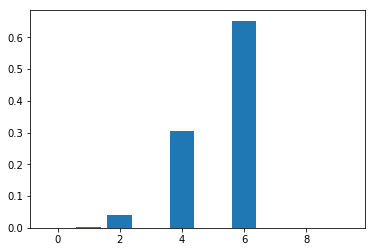

In [95]:
plt.bar(range(10),predictions[247])

In [123]:
len(errors[0])
math.floor(len(errors[0])/3) * 2

58

## More errors 

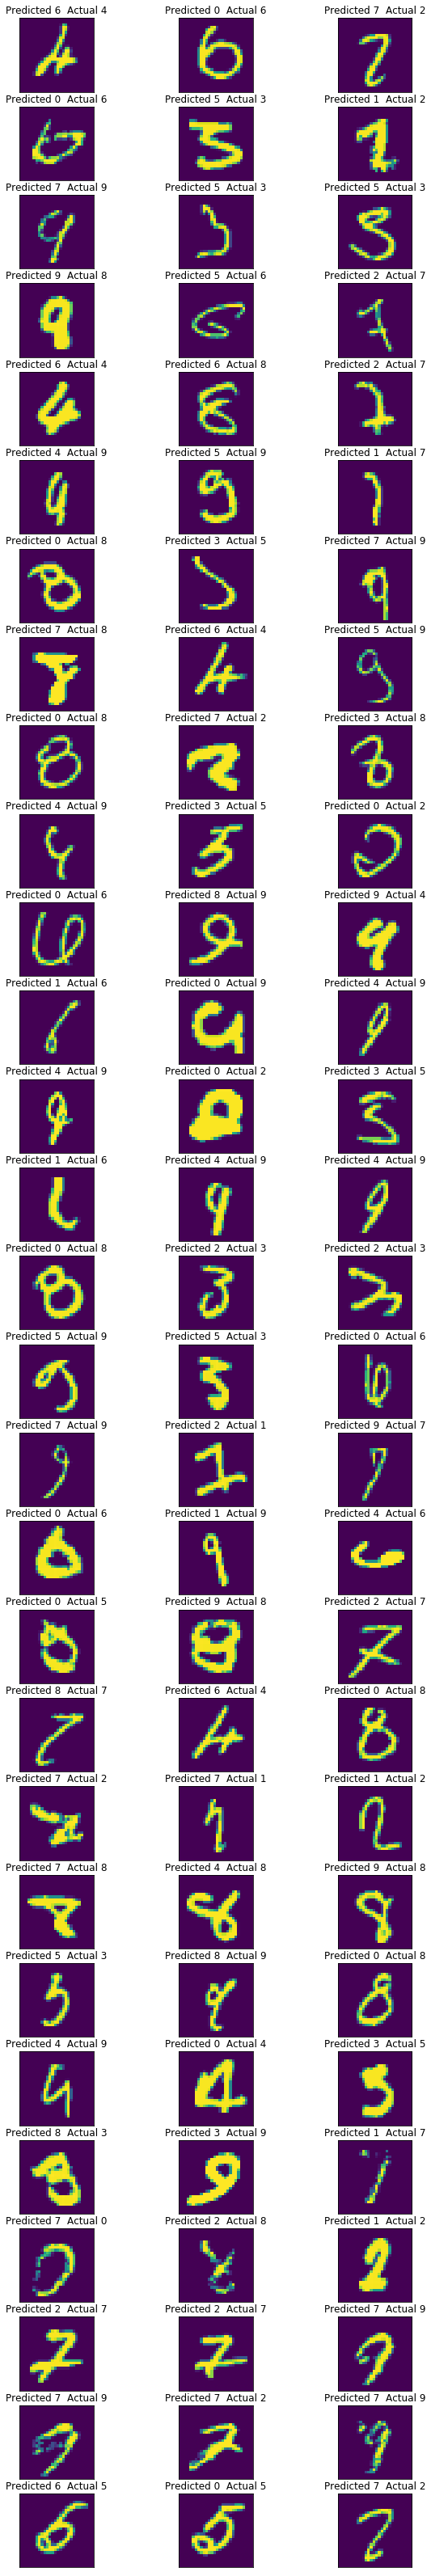

In [124]:
fig = plt.figure(figsize=(10, math.floor(len(errors[0])/3) * 2))
for i in range(len(errors[0])):
  plt.subplot(math.floor(len(errors[0])/3),3,i+1)
  plt.imshow(x_test_plots[errors[0][i]])
  plt.title("Predicted " + str(maxpredictions[errors[0][i]]) + "  Actual " + str(y_test_raw[errors[0][i]]))
  plt.xticks([])
  plt.yticks([])